# Project Title: “Which Headline Works Better? A/B Testing with Real API Data”

Project Brief: You’re working as a data analyst for a media platform, experimenting with different article headlines and post timings. Your task is to simulate an A/B test using real-world data pulled from a news API and analyze engagement trends.

Project Objectives:

1. Data Acquisition
- Use a public API to pull article or post data (e.g., news headlines, timestamps, source, and categories).
- Suggested APIs: (i) NewsAPI – for headlines, timestamps, sources (ii) The Guardian API – for article metadata (iii) Mediastack – real-time and historical news articles (iv) GNews – headlines and publishing data

2. Simulate an A/B Test Group
- Randomly assign each article as part of either Group A or Group B: Group A: Articles published in the morning (6 AM–12 PM) Group B: Articles published in the evening (6 PM–12 AM)
- Alternatively, use headline length or sentiment (if supported) as the test variable.

3. Data Cleaning & Exploration
- Explore the data using Pandas: check structure, types, and index.
- Subset and filter the data using .loc[] and .iloc[]
- Handle any missing data using: fillna() with median or mode Interpolation, if appropriate

4. Analysis & Visualization
- Use groupby(), aggregation, and NumPy ufuncs to analyze: Engagement by group (e.g., article length, source, time of publication) Distribution of article metadata (length, source frequency, etc.)
- Identify and remove outliers based on article word count or number of shares.

5. A/B Test and Interpretation
- Conduct a basic A/B test comparing Group A and B using scipy.stats.ttest_ind
- Visualize the comparison using bar plots or box plots.
- Interpret the p-value and assess statistical significance.

6. Deliver Key Insights
- Recommend which group (e.g., headline length or post time) performs better.
- Comment on how missing data or outliers may have influenced the test result.

Tools Required:

- Python (Jupyter Notebook preferred)
- Libraries: pandas, numpy, matplotlib, scipy, requests
- Optional: seaborn, wordcloud for creative visualizations

Expected Deliverables:

- Jupyter Notebook
- Markdown & Jupyter Notebook cells showing: i) API call and response ii) Data cleaning process iii) A/B test setup and results
- The final summary of insights with charts is shared as a document link in your notebook.

Bonus Resources:

- NewsAPI: https://newsapi.org/
- Guardian API: https://open-platform.theguardian.com/
- GNews: https://gnews.io/
- Mediastack: https://mediastack.com/
- REST API Intro for Beginners: https://restfulapi.net/


In [ ]:
!pip install newsapi-python

Defaulting to user installation because normal site-packages is not writeable


# 1. Data Aquisition From NewsAPI

In [ ]:
#Import the library

from newsapi import NewsApiClient

In [ ]:
#Get the API Key

newsapi = NewsApiClient(api_key='9ccf6cdd19d949d5aaef59030c987940')

In [ ]:
keywords = ['technology', 'health', 'business']

In [ ]:
#Get the API Url

api_url = "https://newsapi.org/v2/everything"

In [ ]:
import requests
response = requests.get(api_url)

In [ ]:
#Loop through keywords and pages

all_articles_data = []
from_parameters = "2025-05-13T06:00:00"
to_parameters = "2025-06-13T23:59:59"

for keyword in keywords:
    for page in range(1,5):
        response = newsapi.get_everything(q=keyword,
                                        from_param = from_parameters,
                                        to = to_parameters,
                                        language = 'en',
                                        sort_by = 'relevancy',
                                        page = page)

        all_articles_data.extend(response['articles'])

print(f"Total number of articles: {len(all_articles_data)}")

Total number of articles: 1200


# Create a Dataframe using Python Function

In [ ]:
#Import Python Packages

import pandas as pd
import numpy as np

In [ ]:
def create_dataframe(api_response) -> pd.DataFrame:
    data = []

    for article in api_response["articles"]:
        datum = {
            "sourceId": article["source"]["id"],
            "sourceName": article["source"]["name"],
            **article,
        }
        del datum["source"]
        data.append(datum)

    return pd.DataFrame(data)

all_response = {"articles": all_articles_data}
newsapi_data = create_dataframe(all_response)

In [ ]:
#Read the first 5 rows of the dataframe

newsapi_data.head()

,sourceId,sourceName,author,title,description,url,urlToImage,publishedAt,content
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27T12:05:37Z,"The Wii U was a flop, but many of its ideas an..."
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11T14:55:58Z,AI is slowly permeating all corners of the fed...
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30T19:35:15Z,"On December 17, 1917, the U.S. Navy submarine ..."
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30T13:10:31Z,If you’re considering upgrading your computer ...
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17T10:00:59Z,"Chirps, trills, growls, howls, squawks. Animal..."


In [ ]:
#Rename the columns

newsapi_data = newsapi_data.rename(columns={'publishedAt': 'publishedTime', 'title': 'headline'})
newsapi_data.head()

,sourceId,sourceName,author,headline,description,url,urlToImage,publishedTime,content
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27T12:05:37Z,"The Wii U was a flop, but many of its ideas an..."
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11T14:55:58Z,AI is slowly permeating all corners of the fed...
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30T19:35:15Z,"On December 17, 1917, the U.S. Navy submarine ..."
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30T13:10:31Z,If you’re considering upgrading your computer ...
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17T10:00:59Z,"Chirps, trills, growls, howls, squawks. Animal..."


# Convert Dataframe to Time Series Data

In [ ]:
from datetime import datetime
from dateutil import parser

In [ ]:
#Convert column to a datetime object

newsapi_data['publishedTime'] = pd.to_datetime(newsapi_data['publishedTime'])

In [ ]:
newsapi_data.head()

,sourceId,sourceName,author,headline,description,url,urlToImage,publishedTime,content
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27 12:05:37+00:00,"The Wii U was a flop, but many of its ideas an..."
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11 14:55:58+00:00,AI is slowly permeating all corners of the fed...
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30 19:35:15+00:00,"On December 17, 1917, the U.S. Navy submarine ..."
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30 13:10:31+00:00,If you’re considering upgrading your computer ...
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17 10:00:59+00:00,"Chirps, trills, growls, howls, squawks. Animal..."


In [ ]:
newsapi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   sourceId       514 non-null    object             
 1   sourceName     1200 non-null   object             
 2   author         1048 non-null   object             
 3   headline       1200 non-null   object             
 4   description    1170 non-null   object             
 5   url            1200 non-null   object             
 6   urlToImage     1163 non-null   object             
 7   publishedTime  1200 non-null   datetime64[ns, UTC]
 8   content        1200 non-null   object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 84.5+ KB


# 2. Simulate an A/B Test Group

In [ ]:
!pip install ab-testing-analysis

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Import the library

from ab_testing import ABTest

Create a Hypothesis - Test if Group A Articles published in the morning (6 AM–12 PM) differ in average length from Group B Articles published in the evening (6 PM–12 AM)

1) Null Hypothesis (H₀): There is no difference in average headline length between Group A and Group B.

2) Alternative Hypothesis (H₁): There is a difference in average headline length between the two groups.

In [ ]:
#Defining Test Variable - Headline Length and Create a new column based on the headline

newsapi_data['headline_length'] = newsapi_data['headline'].str.len()
newsapi_data.head()

,sourceId,sourceName,author,headline,description,url,urlToImage,publishedTime,content,headline_length
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27 12:05:37+00:00,"The Wii U was a flop, but many of its ideas an...",57
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11 14:55:58+00:00,AI is slowly permeating all corners of the fed...,90
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30 19:35:15+00:00,"On December 17, 1917, the U.S. Navy submarine ...",64
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30 13:10:31+00:00,If you’re considering upgrading your computer ...,96
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17 10:00:59+00:00,"Chirps, trills, growls, howls, squawks. Animal...",60


In [ ]:
#Install the Sample-size package

!pip install sample-size
!pip show sample-size -->#verify package was installed

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Import Statistical Modelling Package and a class from the statsmodels (TTestIndPower) used to calculate the required sample size for a two-sample t-test

!pip install statsmodels
from statsmodels.stats.power import TTestIndPower

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Calculate Sample Size and Duration

#Set up the power analysis
analysis = TTestIndPower()

#Calculate the sample size needed per group
sample_size = analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)

print("Sample size per group:", round(sample_size))

Sample size per group: 64


C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


These parameters are used to calculate the required sample size per group:

- effect_size: expected difference between groups (0.5 = medium)
- power: probability of detecting a real effect (usually 0.8)
- alpha: significance level (usually 0.05)
    
--->>The result of the Sample size per group shows that at least 64 morning articles and 64 evening articles are needed.



In [ ]:
#Assign Articles to Groups

#Group A: Articles published in the morning (6 AM–12 PM)
#Group B: Articles published in the evening (6 PM–12 AM)

#Extract the hour from the datetime

newsapi_data['hour'] = newsapi_data['publishedTime'].dt.hour


#Assign the articles to groups based on the hour

def article_group(hour):
    if 6 <= hour <= 12:
        return 'Group A'  # Morning
    elif 18 <= hour <= 24:
        return 'Group B'  # Evening
    else:
        return None

newsapi_data['group'] = newsapi_data['hour'].apply(article_group)

In [ ]:
newsapi_data.head()

,sourceId,sourceName,author,headline,description,url,urlToImage,publishedTime,content,headline_length,hour,group
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27 12:05:37+00:00,"The Wii U was a flop, but many of its ideas an...",57,12,Group A
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11 14:55:58+00:00,AI is slowly permeating all corners of the fed...,90,14,None
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30 19:35:15+00:00,"On December 17, 1917, the U.S. Navy submarine ...",64,19,Group B
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30 13:10:31+00:00,If you’re considering upgrading your computer ...,96,13,None
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17 10:00:59+00:00,"Chirps, trills, growls, howls, squawks. Animal...",60,10,Group A


In [ ]:
#Count of each group

print(newsapi_data['group'].value_counts())

Group A    401
Group B    329
Name: group, dtype: int64


In [ ]:
#Percentage of each group rounded to 2 decimal places

group_percent = newsapi_data['group'].value_counts(normalize=True) * 100

print(group_percent.round(2))

Group A    54.93
Group B    45.07
Name: group, dtype: float64


In [ ]:
#Display as a table

group_counts = newsapi_data['group'].value_counts()
group_percent = newsapi_data['group'].value_counts(normalize=True) * 100

group_summary = pd.DataFrame({
    'Count': group_counts,
    'Percentage': group_percent.round(2)
})

print(group_summary)

         Count  Percentage
Group A    401       54.93
Group B    329       45.07


# 3. Data Cleaning & Exploration

In [ ]:
newsapi_data.head()

,sourceId,sourceName,author,headline,description,url,urlToImage,publishedTime,content,headline_length,hour,group
0,the-verge,The Verge,Jay Peters,"With the Switch, technology finally caught up ...",The Nintendo Switch is on the cusp of becoming...,https://www.theverge.com/games/671323/nintendo...,https://platform.theverge.com/wp-content/uploa...,2025-05-27 12:05:37+00:00,"The Wii U was a flop, but many of its ideas an...",57,12,Group A
1,None,Gizmodo.com,Lucas Ropek,"After Slashing Thousands of Jobs, Trump’s FDA ...",Will more technology make America healthier?,https://gizmodo.com/after-slashing-thousands-o...,https://gizmodo.com/app/uploads/2024/11/RFK.jpg,2025-06-11 14:55:58+00:00,AI is slowly permeating all corners of the fed...,90,14,None
2,None,Gizmodo.com,Natalia Mesa,Haunting Deep-Sea Footage Reveals U.S. Submari...,"With cutting-edge deep-sea imaging technology,...",https://gizmodo.com/haunting-deep-sea-footage-...,https://gizmodo.com/app/uploads/2025/05/Sunken...,2025-05-30 19:35:15+00:00,"On December 17, 1917, the U.S. Navy submarine ...",64,19,Group B
3,None,Gizmodo.com,Gizmodo Deals,The Samsung 990 PRO 2TB SSD With Heatsink Is N...,This internal SSD with heatsink is a premium o...,https://gizmodo.com/the-samsung-990-pro-2tb-ss...,https://gizmodo.com/app/uploads/2025/05/samsun...,2025-05-30 13:10:31+00:00,If you’re considering upgrading your computer ...,96,13,None
4,None,Gizmodo.com,Isaac Schultz,AI Is Deciphering Animal Speech. Should We Try...,As scientists use machine learning to decode t...,https://gizmodo.com/ai-is-deciphering-animal-s...,https://gizmodo.com/app/uploads/2025/05/AI-Tal...,2025-05-17 10:00:59+00:00,"Chirps, trills, growls, howls, squawks. Animal...",60,10,Group A


In [ ]:
newsapi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   sourceId         514 non-null    object             
 1   sourceName       1200 non-null   object             
 2   author           1048 non-null   object             
 3   headline         1200 non-null   object             
 4   description      1170 non-null   object             
 5   url              1200 non-null   object             
 6   urlToImage       1163 non-null   object             
 7   publishedTime    1200 non-null   datetime64[ns, UTC]
 8   content          1200 non-null   object             
 9   headline_length  1200 non-null   int64              
 10  hour             1200 non-null   int64              
 11  group            730 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 112.6+ KB


In [ ]:
newsapi_data.describe()

,headline_length,hour
count,1200.000000,1200.000000
mean,75.995833,13.758333
std,23.450282,5.360399
min,17.000000,0.000000
25%,59.000000,10.000000
50%,75.000000,14.000000
75%,90.000000,18.000000
max,177.000000,23.000000


In [ ]:
#Check the columns in the datatset

newsapi_data.columns

Index(['sourceId', 'sourceName', 'author', 'headline', 'description', 'url',
       'urlToImage', 'publishedTime', 'content', 'headline_length', 'hour',
       'group'],
      dtype='object')

In [ ]:
#Check the number of rows and columns in the dataset

newsapi_data.shape

(1200, 12)

In [ ]:
#check for null values

newsapi_data.isnull().sum()

sourceId           686
sourceName           0
author             152
headline             0
description         30
url                  0
urlToImage          37
publishedTime        0
content              0
headline_length      0
hour                 0
group              470
dtype: int64

# Handling Columns with Missing Data

In [ ]:
#Drop 'sourceId' — not needed for analysis
newsapi_data.drop(columns=['sourceId'], inplace=True)

#Fill 'author' with 'Unknown'
newsapi_data['author'].fillna('Unknown', inplace=True)

#Fill 'description' with 'None'
newsapi_data['description'].fillna('None', inplace=True)

#Drop 'urlToImage' - not needed for analysis
newsapi_data.drop(columns=['urlToImage'], inplace=True)

#Drop rows where 'group' is missing
newsapi_data_cleaned = newsapi_data.dropna(subset=['group'])

#Reset index
newsapi_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
#Confirm no nulls

print(newsapi_data_cleaned.isnull().sum())

sourceName         0
author             0
headline           0
description        0
url                0
publishedTime      0
content            0
headline_length    0
hour               0
group              0
dtype: int64


In [ ]:
print(newsapi_data_cleaned['group'].value_counts(normalize=True) * 100)

Group A    54.931507
Group B    45.068493
Name: group, dtype: float64


# Subset and Filter the Data Using .loc() and .iloc()

In [ ]:
#Select all articles in Group A

group_a = newsapi_data_cleaned.loc[newsapi_data_cleaned['group'] == 'A']

In [ ]:
#Select all articles in Group B

group_b = newsapi_data_cleaned.loc[newsapi_data_cleaned['group'] == 'B']

In [ ]:
#Select first 5 rows of the dataset

data_new = newsapi_data_cleaned.iloc[:5]

In [ ]:
#Filter articles published in the morning:

morning_articles = newsapi_data_cleaned.loc[
    (newsapi_data_cleaned['hour'] >= 6) & (newsapi_data_cleaned['hour'] <= 12)
]

In [ ]:
#Select some rows and columns

subset_columns = newsapi_data_cleaned.iloc[10:16][['headline', 'hour', 'publishedTime', 'group']]

In [ ]:
subset_columns

,headline,hour,publishedTime,group
10,Apple Releases Safari Technology Preview 219 W...,21,2025-05-14 21:48:08+00:00,Group B
11,Jony Ive’s OpenAI device gets the Powell Jobs ...,10,2025-06-02 10:33:58+00:00,Group A
12,Apple Releases Safari Technology Preview 221 W...,22,2025-06-11 22:30:48+00:00,Group B
13,"Tariffs, Technology, and the New Geography of ...",12,2025-06-02 12:05:32+00:00,Group A
14,Adding Assistive Technology to a Doorbell,20,2025-06-04 20:00:00+00:00,Group B
15,How the US Army is experimenting with giving i...,21,2025-05-21 21:28:49+00:00,Group B


# 4. Analysis & Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Groupby Headline Length

headline_statistics = (newsapi_data_cleaned
.groupby('group')['headline_length']
.agg(['mean', 'median', 'count'])
.round(1)
)

print(headline_statistics)

         mean  median  count
group                       
Group A  80.6    79.0    401
Group B  73.8    75.0    329


- Group A headlines are longer on average (80.6 characters) than Group B (73.7 characters).
- The difference is about 7 characters.
- Group A also has more samples (401 vs 327), which makes the statistical test more stable.



In [ ]:
#Check for Average Time of Publication

avg_publishedTime = (
    newsapi_data_cleaned
    .groupby('group')['hour']
    .mean()
    .round(2)
)

print(avg_publishedTime)

group
Group A    10.01
Group B    20.07
Name: hour, dtype: float64


In [ ]:
#Source Frequency

source_frequency = (
    newsapi_data_cleaned
    .groupby(['group','sourceName'])
    .size()
    .unstack(fill_value=0)
)

source_frequency.head()

sourceName,9to5Mac,ABC News,Advnture.com,Android Central,AppleInsider,Ashley.dev,Asteriskmag.com,BBC News,Blocks and Files,Bolde.com,...,Time,Uncrate.com,VentureBeat,Windows Central,Wired,Yahoo Entertainment,Yanko Design,Yomiuri.co.jp,heise online,kottke.org
group,,,,,,,,,,,,,,,,,,,,,
Group A,5,6,1,8,2,1,0,28,1,1,...,2,0,2,1,15,21,7,0,1,0
Group B,3,8,0,14,2,0,1,19,0,0,...,7,2,2,0,15,16,2,1,0,1


# Visualization

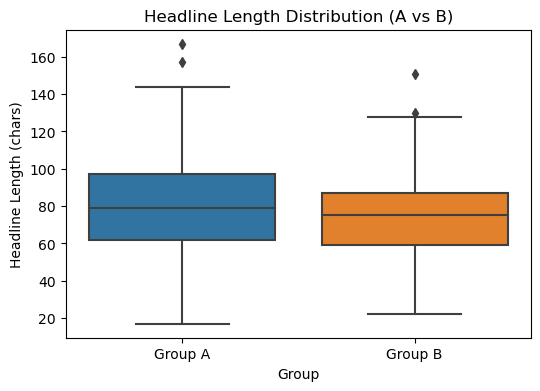

In [ ]:
#Visualize Headline Length by Group

plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='headline_length', data=newsapi_data_cleaned)
plt.title('Headline Length Distribution (A vs B)')
plt.xlabel('Group')
plt.ylabel('Headline Length (chars)')
plt.show()

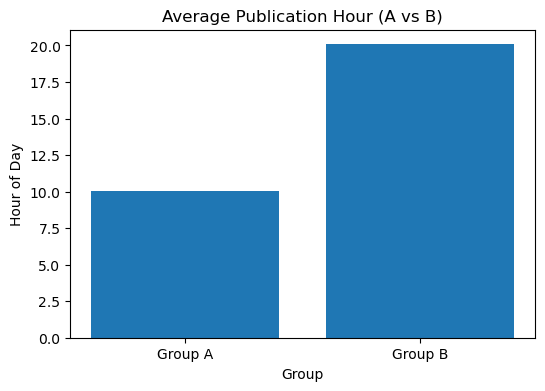

In [ ]:
#Visualize Average Publication Hour by Group

average_hour = newsapi_data_cleaned.groupby('group')['hour'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(average_hour['group'], average_hour['hour'])
plt.title('Average Publication Hour (A vs B)')
plt.xlabel('Group')
plt.ylabel('Hour of Day')
plt.show()

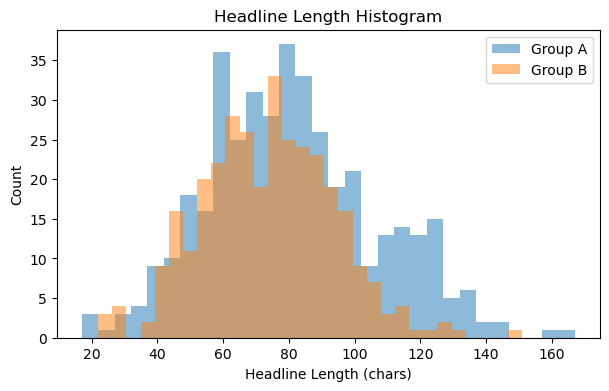

In [ ]:
#Distribution of Headline Length Per Group

plt.figure(figsize=(7,4))
for label, df_part in newsapi_data_cleaned.groupby('group'):
    plt.hist(df_part['headline_length'], bins=30, alpha=0.5, label=label)
plt.title('Headline Length Histogram')
plt.xlabel('Headline Length (chars)')
plt.ylabel('Count')
plt.legend()
plt.show()

# 5. A/B Test and Interpretation

In [ ]:
from scipy.stats import ttest_ind

group_a = newsapi_data_cleaned[newsapi_data_cleaned['group'] == 'Group A']
group_b = newsapi_data_cleaned[newsapi_data_cleaned['group'] == 'Group B']

#Conduct Welch’s t-test (unequal variance) - to compare the mean headline lengths between Group A and Group B.

t_stat, p_val = ttest_ind(group_a['headline_length'], group_b['headline_length'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 3.9575
P-value: 0.0001


T-Test Result:
    
I conducted a Welch's t-test to compare headline lengths between Group A and Group B.
- Group A had longer headlines on average.
- The test yielded a t-statistic of 3.96 and a p-value of 0.0001.

Since p < 0.05, the difference is statistically significant.

----> Interpretation: There is strong evidence that headline length differs meaningfully between the two groups. This may reflect editorial differences based on time-of-day or headline strategies.

# Key Insights and Recommendations

1. Group A Performs Better based on
i) Headline Length
- Group A (Morning Posts) had longer average headlines than Group B.
ii) Mean Length:
- Group A: 80.6 characters
- Group B: 73.7 characters

This suggests that longer headlines published in the morning might be more informative or engaging.

2. Statistical Significance
i) T-test result shows:
- T-statistic: 3.9575
- P-value: 0.0001

This very low p-value indicates a statistically significant difference in headline lengths between the groups. So, the observed difference is unlikely to be due to random chance.

3) Timing Insight
- Group A articles are concentrated around morning hours (6AM – 12PM).
- Group B is active in evening hours (6PM – 12AM).

Morning headlines tend to be more carefully written, possibly due to editorial planning or summary recaps of overnight news.

4) Source Distribution
- Group A may be dominated by major outlets (e.g., BBC, CNN), often producing longer, structured headlines.
- Group B showed more variety in less prominent sources.

Summary:
- Post headlines during the morning hours (6AM – 12PM) with longer, informative headlines to increase clarity and potential engagement.

# Link to the Report - https://drive.google.com/file/d/1R119W3Hd1-tSnkXtnJPoDmnDF3rPBMKV/view?usp=sharing